# PySpark session

In [1]:
import os
from pyspark.sql import SparkSession

In [22]:
# use java17
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk"
os.environ["PATH"] = f"/usr/lib/jvm/java-17-openjdk/bin:{os.environ['PATH']}"

spark = SparkSession.builder.getOrCreate()

# EDA utility functions

In [3]:
from pyspark.sql import DataFrame, functions as F

def basic_info(df, name):
    print(f"\n=== {name} ===")
    print("Row count:", df.count())
    df.printSchema()


def null_counts(df, name):
    print(f"\n--- Null Value Counts: {name} ---")
    df.select(
        [F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]
    ).show(truncate=False)


def distinct_values(df, cols, name):
    print(f"\n--- Distinct Values: {name} ---")
    for c in cols:
        if c in df.columns:
            print(f"\nColumn: {c}")
            df.groupBy(c).count().orderBy("count", ascending=False).show(
                10, truncate=False
            )

def numeric_summary(df, cols, name):
    print(f"\n--- Numeric Summary: {name} ---")
    for c in cols:
        if c in df.columns:
            print(f"\nColumn: {c}")
            df.describe([c]).show()

In [4]:
reservations = spark.read.option("header", True).csv(
    "data/raw/customer-reservations.csv", inferSchema=True
)
bookings = spark.read.option("header", True).csv(
    "data/raw/hotel-booking.csv", inferSchema=True
)

# Basic Info

In [5]:
basic_info(reservations, "Customer Reservations")
basic_info(bookings, "Hotel Bookings")


=== Customer Reservations ===
Row count: 36275
root
 |-- Booking_ID: string (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: integer (nullable = true)
 |-- arrival_date: integer (nullable = true)
 |-- market_segment_type: string (nullable = true)
 |-- avg_price_per_room: double (nullable = true)
 |-- booking_status: string (nullable = true)


=== Hotel Bookings ===
Row count: 78703
root
 |-- hotel: string (nullable = true)
 |-- booking_status: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (n

# Null Counts

In [6]:
null_counts(reservations, "Customer Reservations")
null_counts(bookings, "Hotel Bookings")


--- Null Value Counts: Customer Reservations ---
+----------+-----------------------+--------------------+---------+------------+-------------+------------+-------------------+------------------+--------------+
|Booking_ID|stays_in_weekend_nights|stays_in_week_nights|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|avg_price_per_room|booking_status|
+----------+-----------------------+--------------------+---------+------------+-------------+------------+-------------------+------------------+--------------+
|0         |0                      |0                   |0        |0           |0            |0           |0                  |0                 |0             |
+----------+-----------------------+--------------------+---------+------------+-------------+------------+-------------------+------------------+--------------+


--- Null Value Counts: Hotel Bookings ---
+-----+--------------+---------+------------+-------------+------------------------+------------

# Distinct Values (categorical checks)

In [7]:
distinct_values(reservations, ["booking_status", "market_segment_type"], "Reservations")
distinct_values(bookings, ["booking_status", "market_segment"], "Bookings")


--- Distinct Values: Reservations ---

Column: booking_status
+--------------+-----+
|booking_status|count|
+--------------+-----+
|Not_Canceled  |24390|
|Canceled      |11885|
+--------------+-----+


Column: market_segment_type
+-------------------+-----+
|market_segment_type|count|
+-------------------+-----+
|Online             |23214|
|Offline            |10528|
|Corporate          |2017 |
|Complementary      |391  |
|Aviation           |125  |
+-------------------+-----+


--- Distinct Values: Bookings ---

Column: booking_status
+--------------+-----+
|booking_status|count|
+--------------+-----+
|0             |50224|
|1             |28479|
+--------------+-----+



# Numeric Summaries

In [8]:
numeric_summary(reservations, ["lead_time", "avg_price_per_room"], "Reservations")
numeric_summary(bookings, ["lead_time", "avg_price_per_room"], "Bookings")


--- Numeric Summary: Reservations ---

Column: lead_time
+-------+-----------------+
|summary|        lead_time|
+-------+-----------------+
|  count|            36275|
|   mean|85.23255685733976|
| stddev|85.93081669923292|
|    min|                0|
|    max|              443|
+-------+-----------------+


Column: avg_price_per_room
+-------+------------------+
|summary|avg_price_per_room|
+-------+------------------+
|  count|             36275|
|   mean| 103.4235390764958|
| stddev| 35.08942403637024|
|    min|               0.0|
|    max|             540.0|
+-------+------------------+


--- Numeric Summary: Bookings ---

Column: lead_time
+-------+------------------+
|summary|         lead_time|
+-------+------------------+
|  count|             78703|
|   mean|101.29846384508849|
| stddev|106.20064931641437|
|    min|                 0|
|    max|               737|
+-------+------------------+


Column: avg_price_per_room
+-------+------------------+
|summary|avg_price_per_roo

# Reservation Graphs

In [9]:
res_pd = reservations.toPandas()

<Axes: >

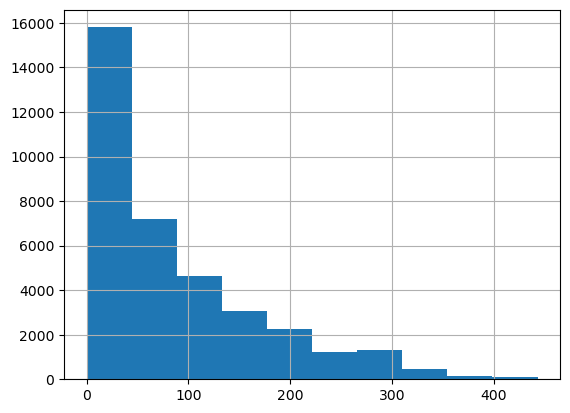

In [10]:
res_pd["lead_time"].hist()

<Axes: >

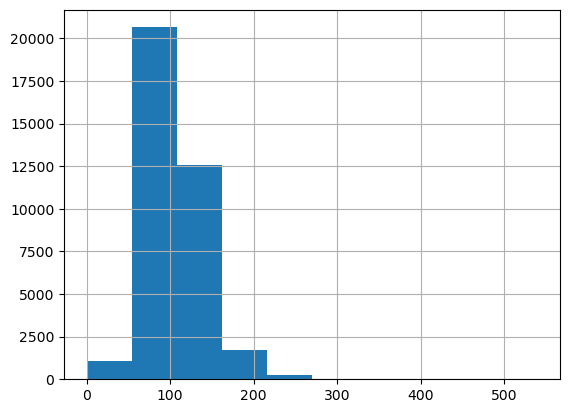

In [11]:
res_pd["avg_price_per_room"].hist()

<Axes: >

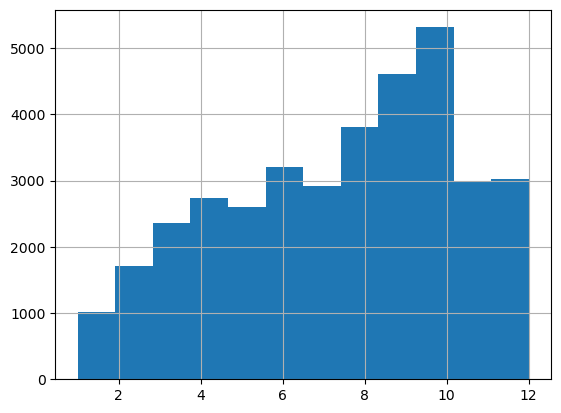

In [12]:
res_pd["arrival_month"].hist(bins=12)

<Axes: >

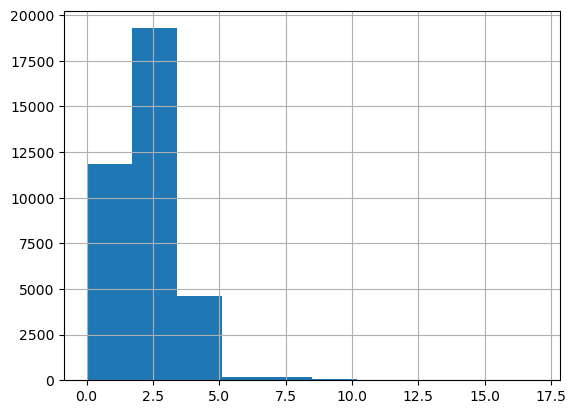

In [13]:
res_pd["stays_in_week_nights"].hist()

<Axes: >

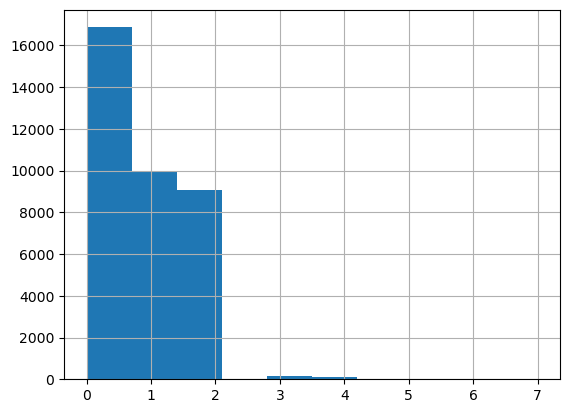

In [14]:
res_pd["stays_in_weekend_nights"].hist()

# Booking Graphs

In [15]:
booking_pd = bookings.toPandas()

<Axes: >

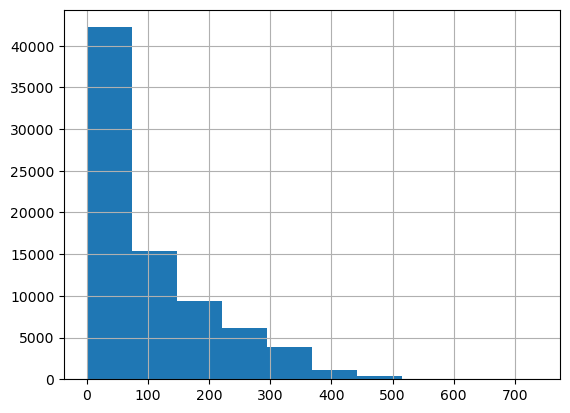

In [16]:
booking_pd["lead_time"].hist()

<Axes: >

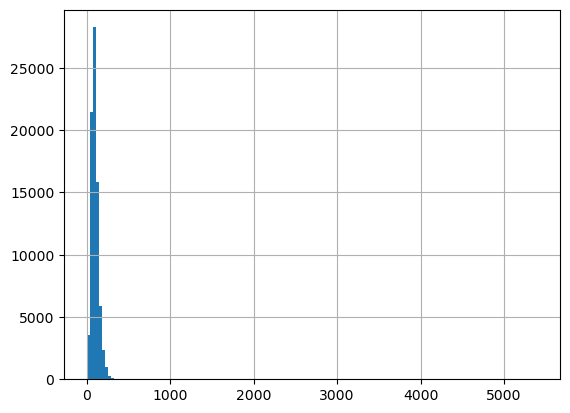

In [17]:
booking_pd["avg_price_per_room"].hist(bins=150)

<Axes: >

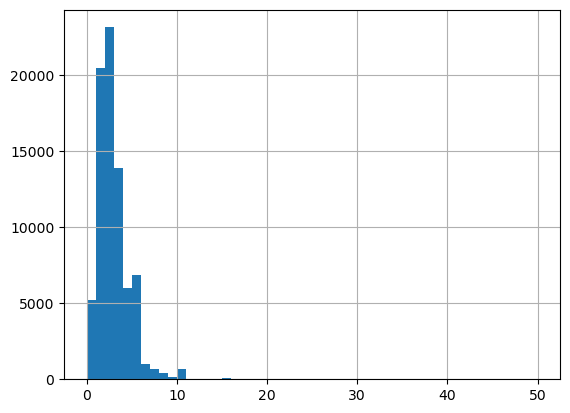

In [18]:
booking_pd["stays_in_week_nights"].hist(bins=50)